In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)


In [7]:
dfcelltype = pd.read_csv('./02_readouts_celltype.csv', index_col=0)
dfcelltype.head()

,CANCER,Adipocyte,Apoptosis_pathway,Bcell,CD4_Tcell,CD8_Tcell,CPI_Response,CPI_effect,Cytokine_chemokine,Cytotoxic_Tcell,...,Stroma,TGFb_pathway,TLS,TMB,Tcell_exclusion,Tcell_general,Treg,cDC,pDC,Reference
Index,,,,,,,,,,,,,,,,,,,,,
IMVigor210-0257bb-ar-0257bbb,2.231586,0.095630,0.184865,-0.101285,0.000709,0.111215,-0.095574,-0.108335,0.007202,-0.026011,...,-0.117547,-0.044376,-0.187580,0.247796,-0.081353,-0.185191,-0.120832,-0.054601,-0.013504,0.954684
IMVigor210-025b45-ar-025b45c,2.231571,0.027646,0.168403,-0.095822,-0.164405,0.076903,-0.115808,-0.093869,0.062431,-0.227304,...,-0.147676,0.150748,-0.140836,0.168329,-0.090209,-0.228629,-0.136457,-0.041072,-0.113345,0.962315
IMVigor210-032c64-ar-032c642,2.231654,-0.018395,0.208292,-0.128894,0.033699,0.095141,-0.164183,0.134724,-0.143532,0.236043,...,-0.076602,0.044724,-0.162292,0.293963,-0.065497,0.049252,-0.113452,0.102485,0.089825,0.959041
IMVigor210-0571f1-ar-0571f17,2.231629,-0.080947,0.082151,0.068193,-0.203625,0.238796,-0.171105,0.152739,-0.045930,0.200654,...,-0.097851,-0.039122,0.399589,0.231509,-0.107365,0.472308,-0.066194,-0.090312,0.038006,0.958613
IMVigor210-065890-ar-0658907,2.231627,0.024996,0.252321,-0.137305,0.008070,0.087979,-0.103647,-0.016986,0.047156,0.061902,...,-0.040036,-0.115632,-0.234322,0.233928,-0.095498,-0.064346,-0.114739,-0.027730,-0.092800,0.953356


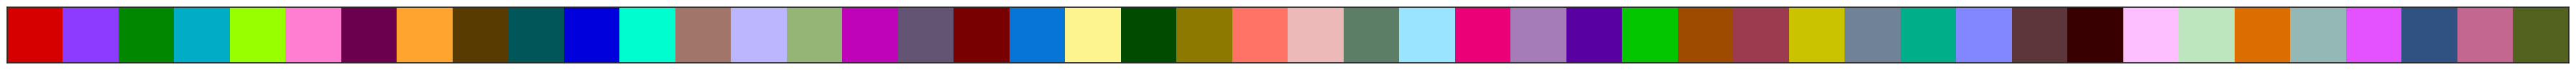

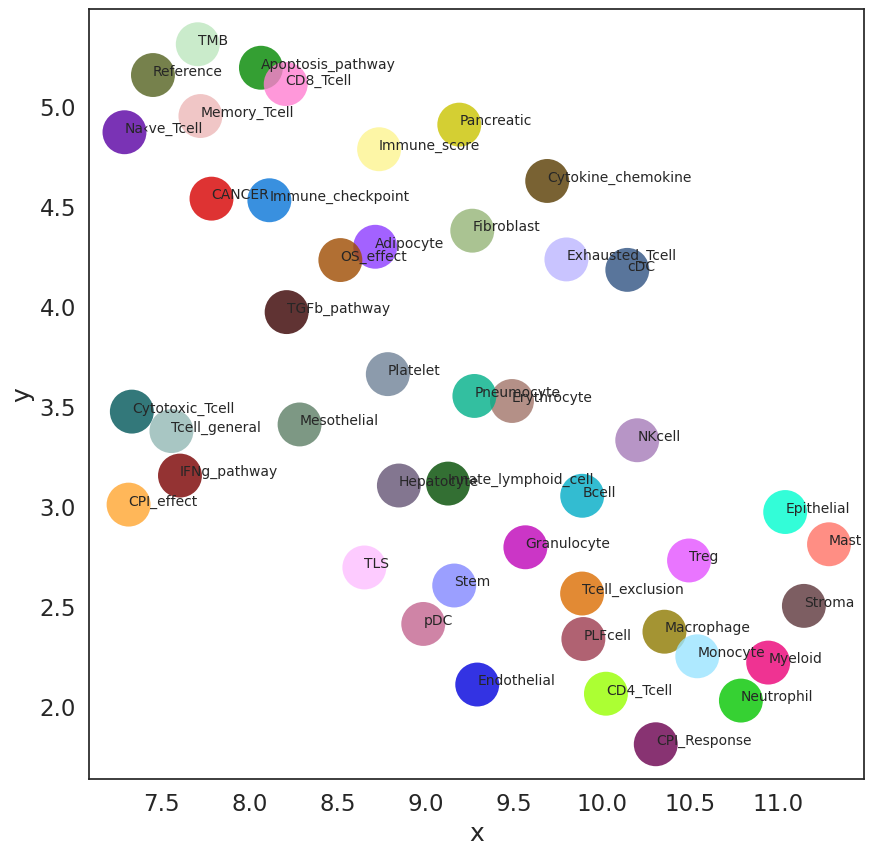

In [23]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding

import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=len(dfcelltype.columns))
sns.palplot(palette)

mp = UMAP(n_components = 2,)
c2d = mp.fit_transform(dfcelltype.T)
df2d  = pd.DataFrame(c2d, index=dfcelltype.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 1000,
                palette=palette, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':10})

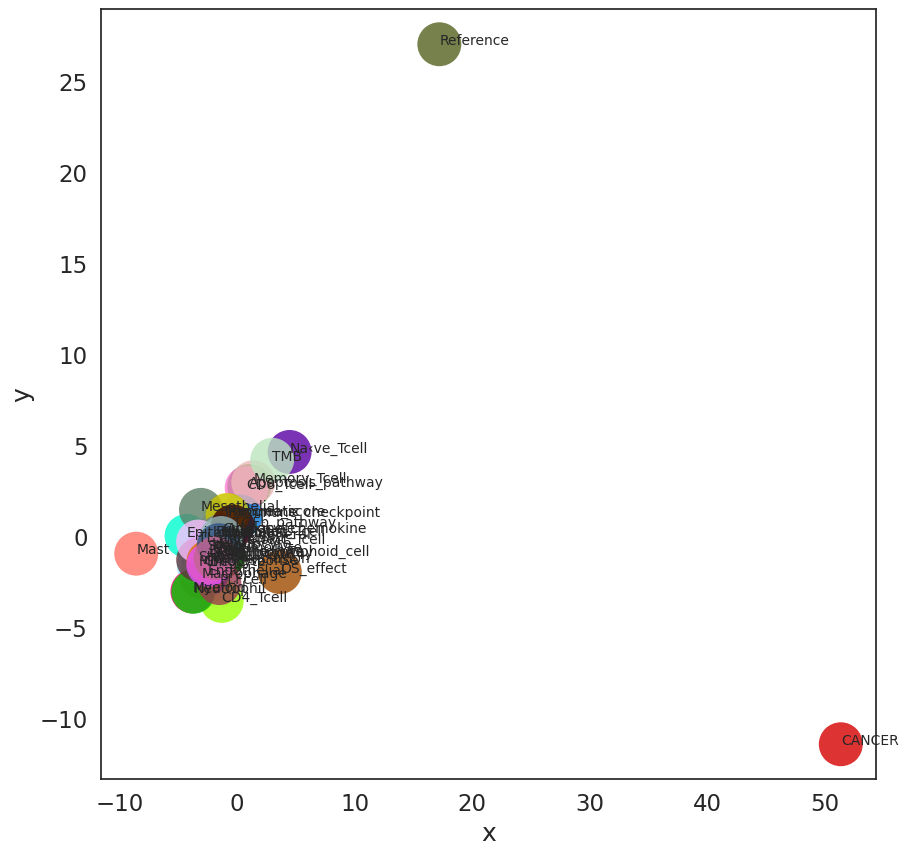

In [24]:
mp = PCA(n_components = 2)
c2d = mp.fit_transform(dfcelltype.T)
df2d  = pd.DataFrame(c2d, index=dfcelltype.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 1000,
                palette=palette, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':10})

/tmp/ipykernel_239206/3878727086.py:7: UserWarning: The palette list has more values (46) than needed (42), which may not be intended.
  sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 1000,


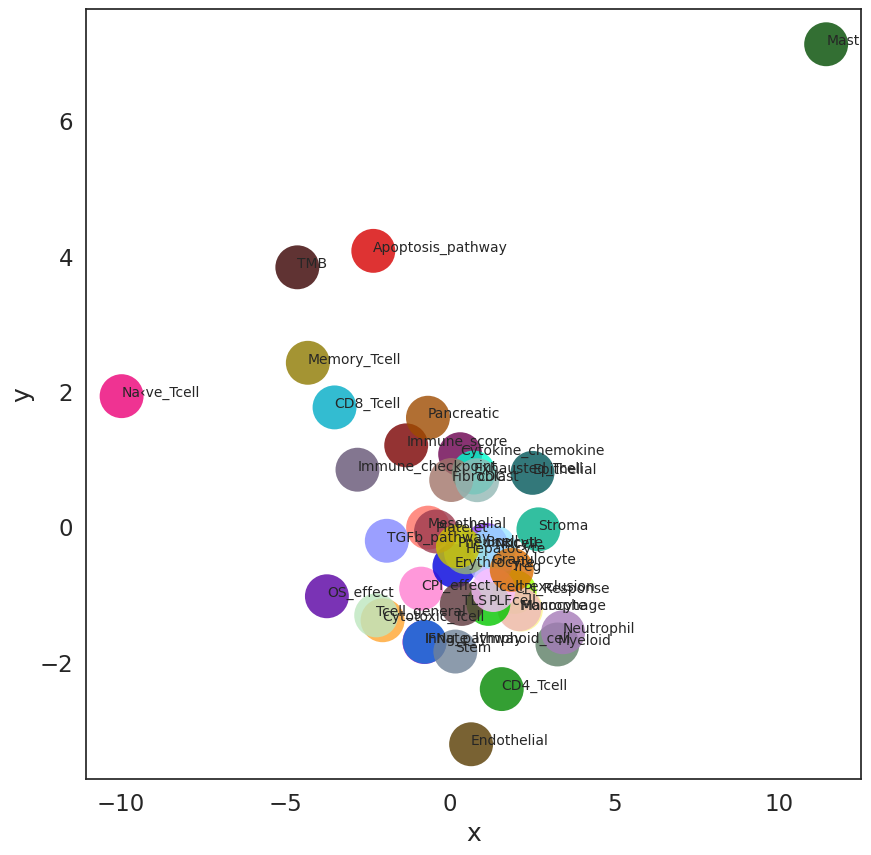

In [29]:
dfcelltype = dfcelltype[dfcelltype.columns[1:-1]]
mp = PCA(n_components = 2)
c2d = mp.fit_transform(dfcelltype.T)
df2d  = pd.DataFrame(c2d, index=dfcelltype.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 1000,
                palette=palette, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':10})

# ax.set_ylim(-5, 5)
# ax.set_xlim(-10, 10)

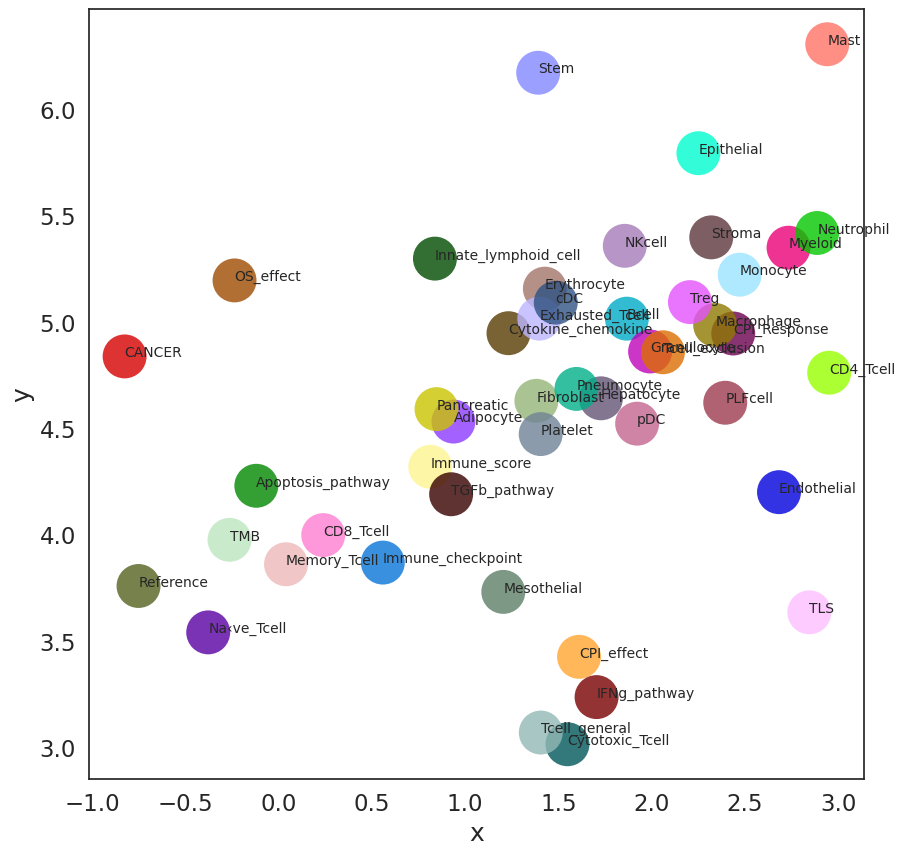

In [10]:
mp = TSNE(n_components = 2)
c2d = mp.fit_transform(dfcelltype.T)
df2d  = pd.DataFrame(c2d, index=dfcelltype.columns, columns = ['x', 'y'])
df2d['c'] = df2d.index
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data = df2d, x = 'x', y= 'y', hue = 'c',  alpha = 0.8, linewidth=0.0, s = 1000,
                palette=palette, ax=ax, legend=False)

for name in df2d.index:
    s = df2d.loc[name]
    ax.text(s.x, s.y, name,  fontdict={'fontsize':10})